In [1]:
import CMGDB_utils

import numpy as np
import time

## Leslie map example

Define the Leslie map

In [2]:
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * np.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

Define a box map which takes a rectangle as input and returns a rectangle

In [3]:
def F(rect):
    return CMGDB_utils.BoxMap(f, rect)

Define a model to compute the dynamics

In [4]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [500, 500]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='BoxMap', padding=False)
# model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='B', padding=False)

Compute the dynamics of the model

In [5]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 13.5 s, sys: 272 ms, total: 13.7 s
Wall time: 13.9 s


Plot the Morse graph and the Morse sets

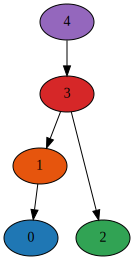

In [6]:
CMGDB_utils.PlotMorseGraph(morse_graph)

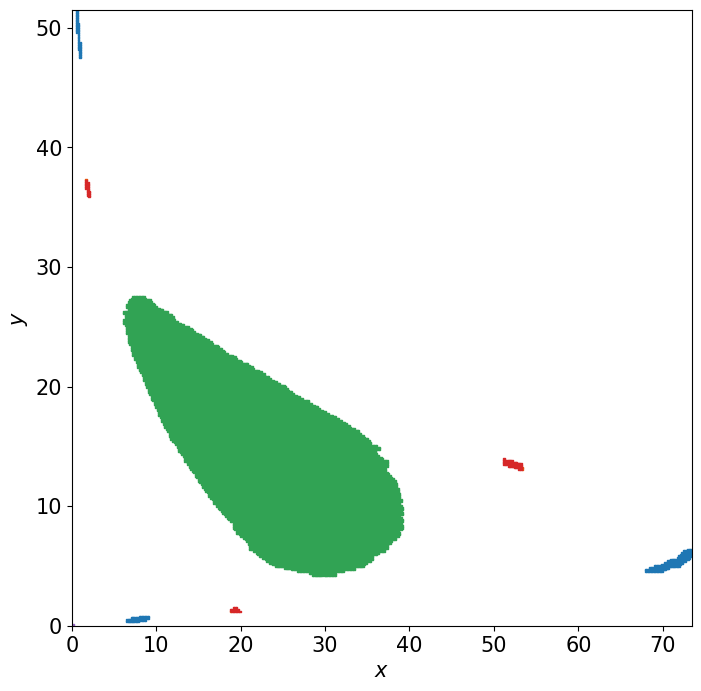

In [7]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

### Save Morse sets to file

In [8]:
morse_sets_fname = 'morse_sets.csv'

CMGDB_utils.SaveMorseSets(morse_graph, cubical_complex, morse_sets_fname)

### Plot Morse sets from file

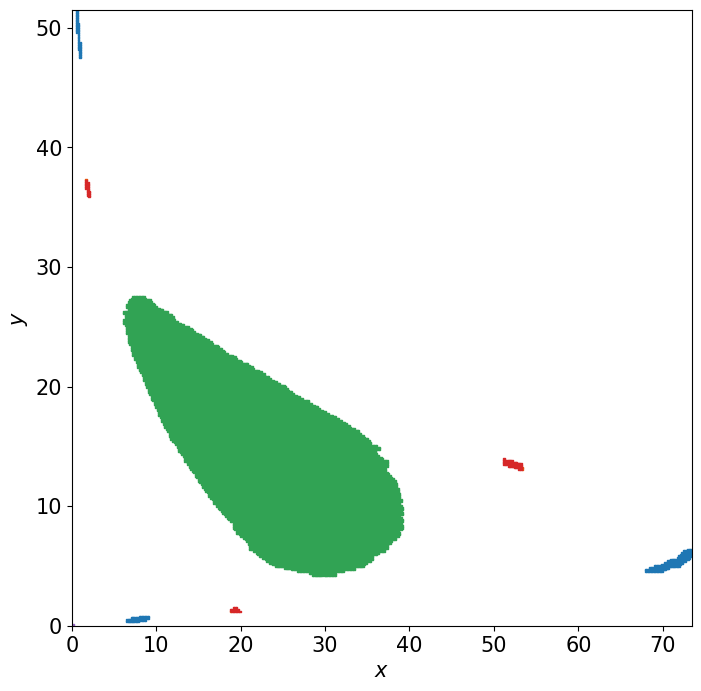

In [9]:
morse_sets_fname = 'morse_sets.csv'

CMGDB_utils.PlotMorseSets(morse_sets_fname)

## Conley index examples

The function `ComputeConleyMorseGraph` can be used to compute the Morse graph and the Conley index corresponding to each Morse graph node.

In [10]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model)

CPU times: user 15 s, sys: 311 ms, total: 15.3 s
Wall time: 16.3 s


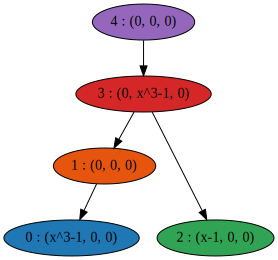

In [11]:
CMGDB_utils.PlotMorseGraph(morse_graph)

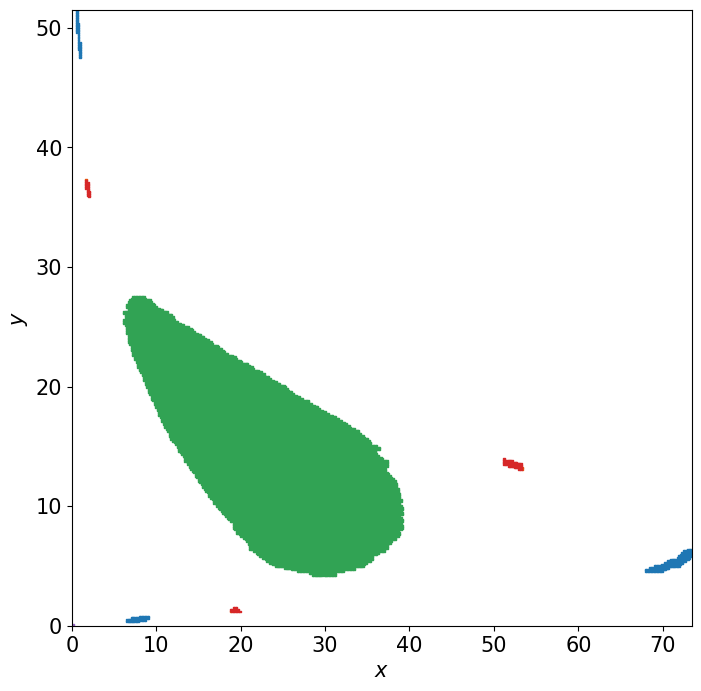

In [12]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

In all the following examples one can replace `ComputeConleyMorseGraph` with `ComputeMorseGraph` to compute just the Morse graph and skip computing the the Conley index.

### MultiBox map example

Define a multi box map taking a rectangle as input and returning a list of rectangles as output. In the example below we evaluate the map at the center point of the the input rectangle and return a box, with the same size as the input rectangle, containing the image.

In [13]:
def F(box):
    return CMGDB_utils.MultiBoxMap(f, box, mode='center')

Define a model and compute dynamics. Notice that we need to specify the map type as `MultiBoxMap` and that we pad the covering of the image by a layer of cubes.

In [14]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [400, 300]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='MultiBoxMap', padding=True)
# model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='M', padding=True)

In [15]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model)
# morse_graph, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 9.53 s, sys: 226 ms, total: 9.76 s
Wall time: 9.75 s


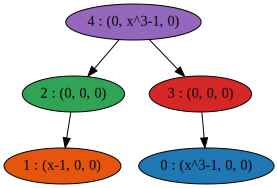

In [16]:
CMGDB_utils.PlotMorseGraph(morse_graph)

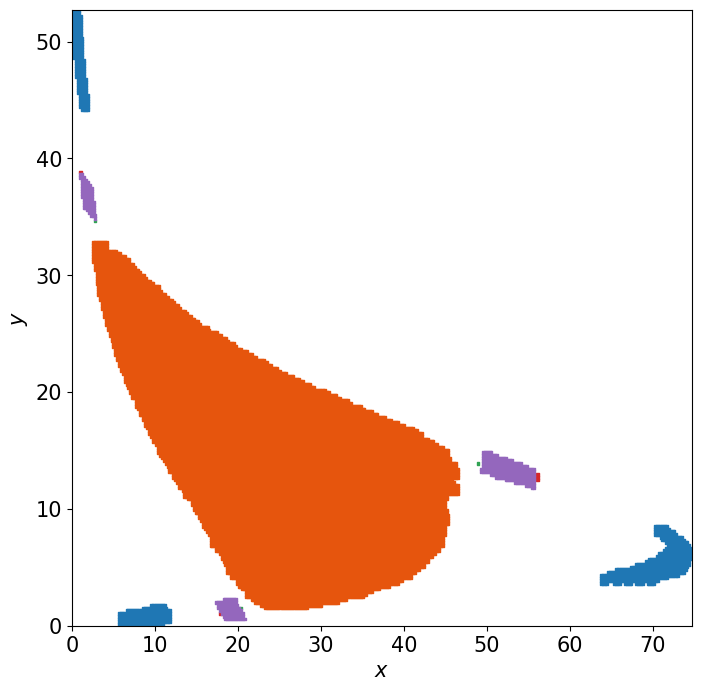

In [17]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

## Data examples

We sample random points in the domain and evaluate the Leslie map at those points and use the data to compute dynamics.

In [18]:
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * np.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

In [19]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]

# Sample 5000 points
num_pts = 5000

dim = len(lower_bounds)
np.random.seed(0)
X = np.random.uniform(lower_bounds, upper_bounds, size=(num_pts, dim))

Y = np.array([f(x) for x in X])

Define a BoxMap using the data

In [20]:
F = CMGDB_utils.BoxMapData(X, Y)

Define a model and compute dynamics

In [21]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [200, 200]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='BoxMap', padding=False)

In [22]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model)
# morse_graph, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 30.4 s, sys: 820 ms, total: 31.2 sReturning no answer due to lack of acyclicity in map.
Problem computing conley index. Returning undefined result

Wall time: 36.4 s


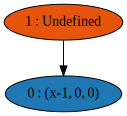

In [23]:
CMGDB_utils.PlotMorseGraph(morse_graph)

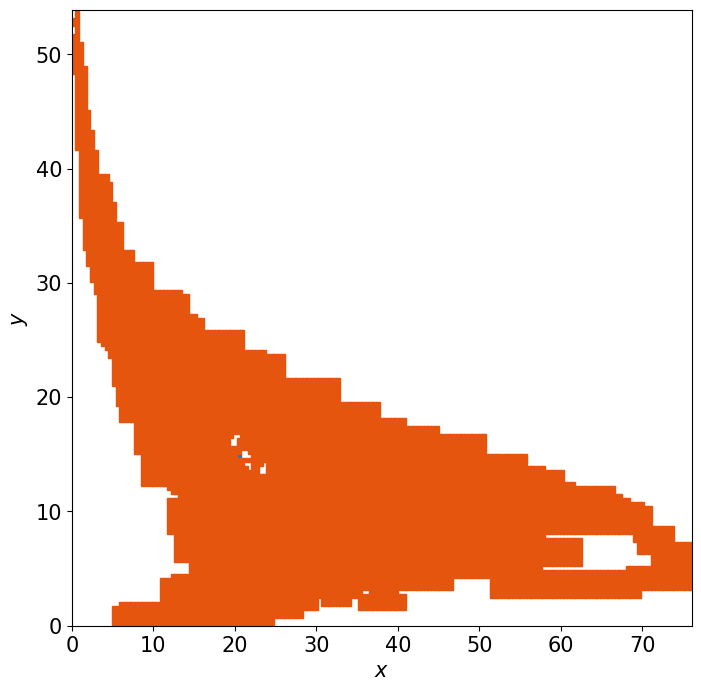

In [24]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

If the computed multi-valued map is not acyclic, the code may return that the Conley index is undefined. One can try to compute the Conley index even in the case of a non-acyclic multi-valued map by setting the flag `acyclic_check` to `False`.

In [25]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model, acyclic_check=False)

CPU times: user 24.8 s, sys: 344 ms, total: 25.2 s
Wall time: 25.6 s


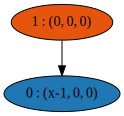

In [26]:
CMGDB_utils.PlotMorseGraph(morse_graph)

### MultiBox data examples

Define a multi box map from data where the size of each rectangle is equal the size of the input rectangle (this is the default).

In [27]:
F = CMGDB_utils.BoxMapData(X, Y, multi_box=True)

Define a model and compute dynamics

In [28]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [200, 200]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='MultiBoxMap', padding=False)

In [29]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model, acyclic_check=False)
# morse_graph, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 28 s, sys: 589 ms, total: 28.6 s
Wall time: 31 s


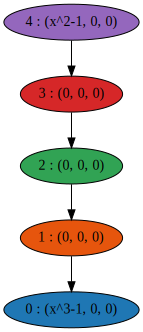

In [30]:
CMGDB_utils.PlotMorseGraph(morse_graph)

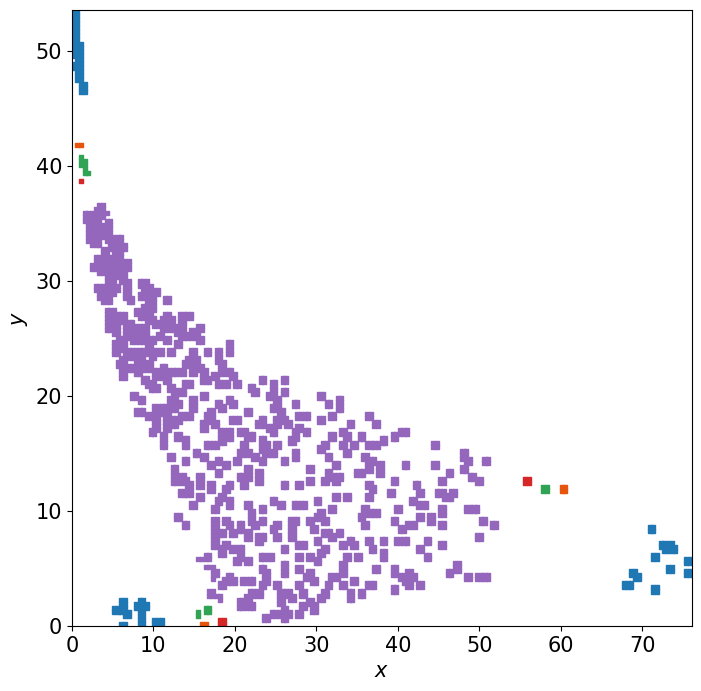

In [31]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

### MultiBox map from data with custom sized boxes

Define a multi box map from data with custom sized boxes

In [32]:
F = CMGDB_utils.BoxMapData(X, Y, multi_box=True, box_size=0.5)
# F = CMGDB_utils.BoxMapData(X, Y, multi_box=True, box_size=0)

Define a model and compute dynamics

In [33]:
lower_bounds = [0.0, 0.0]
upper_bounds = [90.0, 70.0]
grid_size = [200, 200]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, map_type='MultiBoxMap', padding=False)

In [34]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model, acyclic_check=False)
# morse_graph, cubical_complex = CMGDB_utils.ComputeMorseGraph(model)

CPU times: user 32.1 s, sys: 721 ms, total: 32.8 s
Wall time: 35.9 s


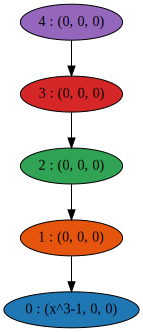

In [35]:
CMGDB_utils.PlotMorseGraph(morse_graph)

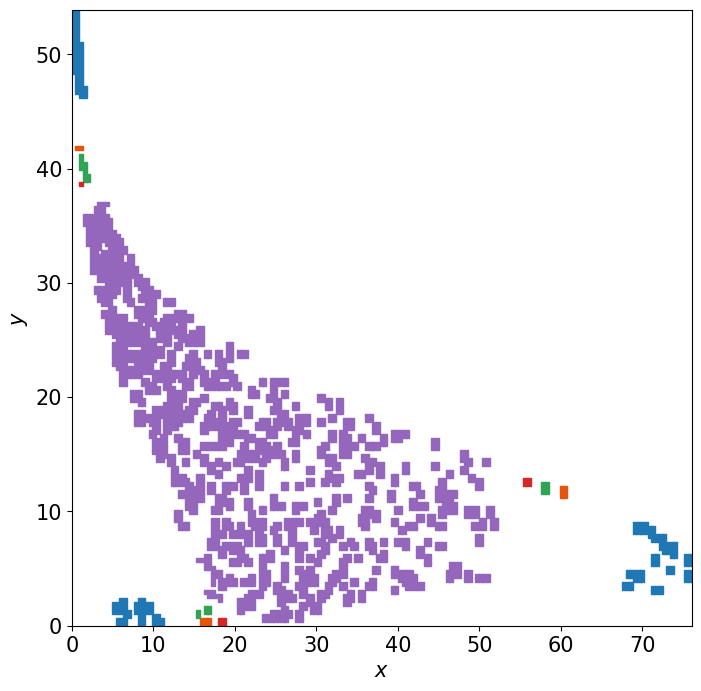

In [36]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex)

## Periodic boundary conditions

We can set the `periodic` flag as in the example below to compute with periodic boundary conditions.

In [37]:
def f(x):
    return [((x[0] - 0.5)**3 + 0.5) % 1, (np.cbrt((x[1] - 0.5)) + 0.5) % 1]

In [38]:
def F(rect):
    return CMGDB_utils.BoxMap(f, rect)

In [39]:
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]
periodic = [True, True]
grid_size = [300, 300]

model = CMGDB_utils.Model(lower_bounds, upper_bounds, grid_size, F, periodic=periodic, map_type='BoxMap', padding=True)

In [40]:
%%time
morse_graph, cubical_complex = CMGDB_utils.ComputeConleyMorseGraph(model, acyclic_check=False)

CPU times: user 10.5 s, sys: 157 ms, total: 10.6 s
Wall time: 10.8 s


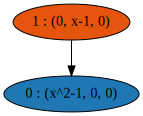

In [41]:
CMGDB_utils.PlotMorseGraph(morse_graph)

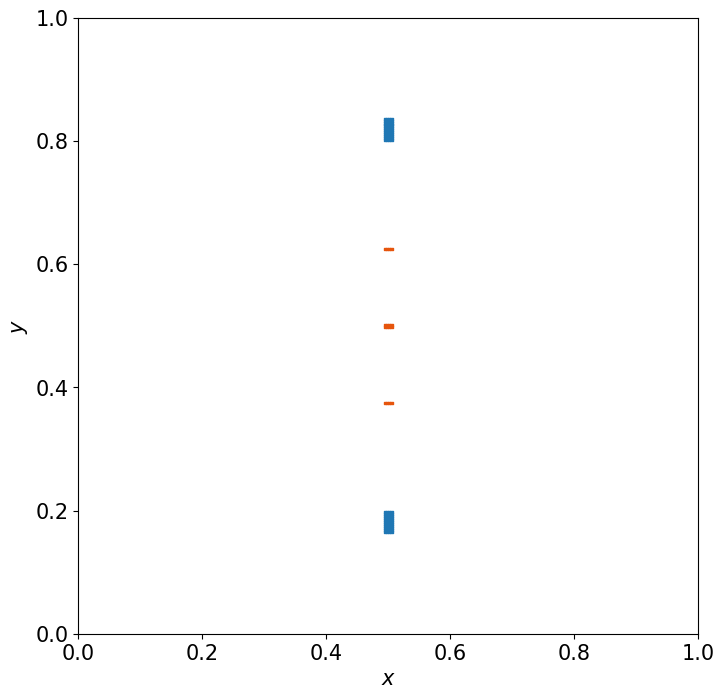

In [42]:
CMGDB_utils.PlotMorseSets(morse_graph, cubical_complex, xlim=[0, 1], ylim=[0, 1])